In [ ]:
print("ciao")

: 

In [3]:
! pip install pandas
! pip install numpy

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.6 MB 7.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.6 MB 7.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.8/11.6 MB 7.3 MB/s eta 0:00:01
   -------------------------- ------------- 7.6/11.6 MB 7.3 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.6 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.9 MB 12.2 MB/s eta 0:00:01
   ------------------ --------------------- 6.0/12.9 MB 14.8 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.9 MB 12.8 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.9 MB 13.2 MB/s eta 0:00:01
   ----

In [4]:
import pandas as pd
import numpy as np

In [7]:
! pip install matplotlib
import matplotlib.pyplot as plt

  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   --- ------------------------------------ 2.1/25.3 MB 9.8 MB/s eta 0:00:03
   ------- -------------------------------- 4.7/25.3 MB 11.4 MB/s eta 0:00:02
   ----------- ---------------------------- 7.3/25.3 MB 11.6 MB/s eta 0:00:02
   ---------------- ----------------------- 10.2/25.3 MB 12.0 MB/s eta 0:00:02
   --------------------- ------------------ 13.4/25.3 MB 12.5 MB/s eta 0:00:01
   -------------------------- ------------- 16.5/25.3 MB 13.0 MB/s eta 0:00:01
   ------------------------------- -------- 20.2/25.3 MB 13.6 MB/s eta 0:00:01
   ------------------------------------ --- 23.3/25.3 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 25.3/25.3 MB 13.2 MB/s eta 0:00:00


c:\Users\loren\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\loren\anaconda3\envs\python_project\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\loren\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In o

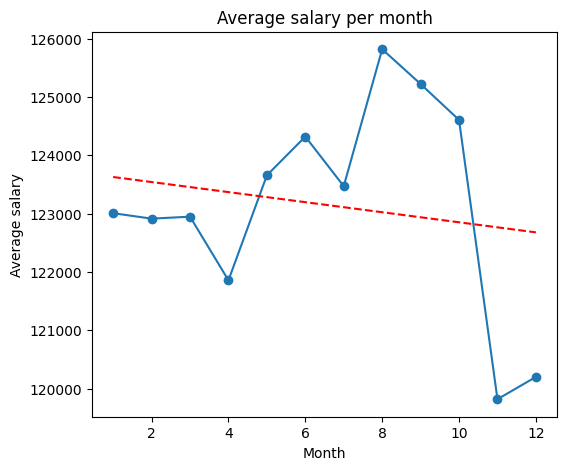

In [ ]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) calculate average salary
avg_salary_month = df.groupby('job_posted_month')['salary_year_avg'].mean()
avg_salary_month = avg_salary_month.sort_index()

# 5) calculate slope of the trendline
slope, intercept = np.polyfit(avg_salary_month.index, avg_salary_month.values, 1)
trendline = slope * avg_salary_month.index + intercept

# 6) create graph
plt.figure(figsize=(6,5)) #size
plt.title('Average salary per month')
plt.xlabel('Month')
plt.ylabel('Average salary')
plt.scatter(avg_salary_month.index, avg_salary_month.values)
plt.plot(avg_salary_month.index, avg_salary_month.values)
plt.plot(avg_salary_month.index, trendline, color='red', linestyle = '--')
plt.show()